In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Advertising.csv')
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df[['TV', 'Radio', 'Newspaper', 'Sales']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
print(df.isna().sum(), end='\n\n')
print(df.isnull().sum(), end='\n\n')
print(df.duplicated().sum(), end='\n\n')

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

0



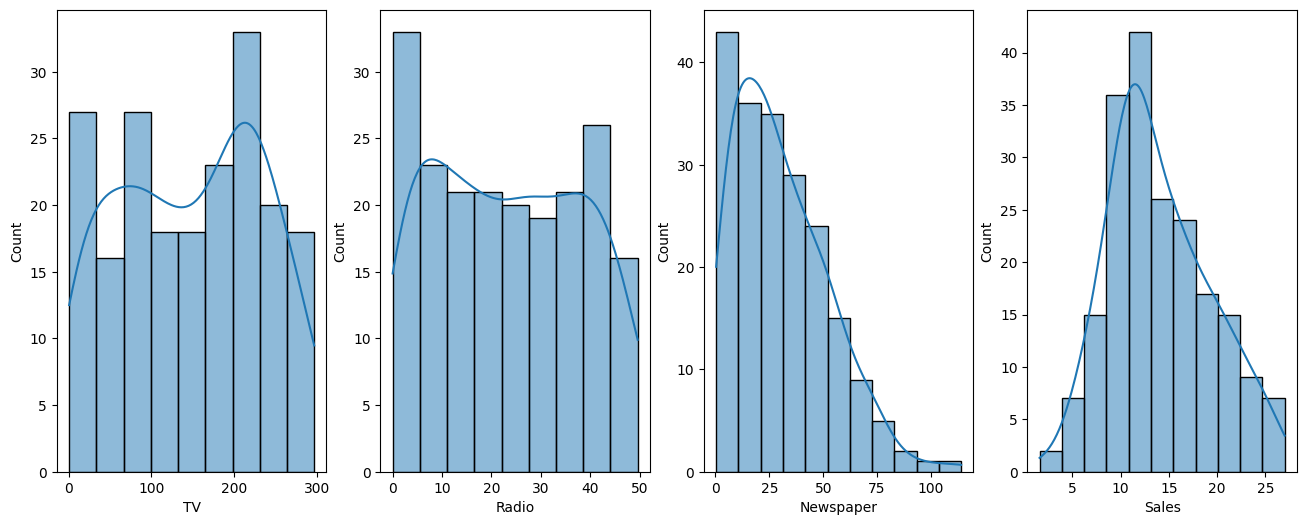

In [14]:
fig = plt.figure(figsize=(16,6))
for i in range(len(df.columns)):
    col = df.columns[i]
    sub = fig.add_subplot(1,4,i+1)
    sns.histplot(data=df, x=col, kde=True)


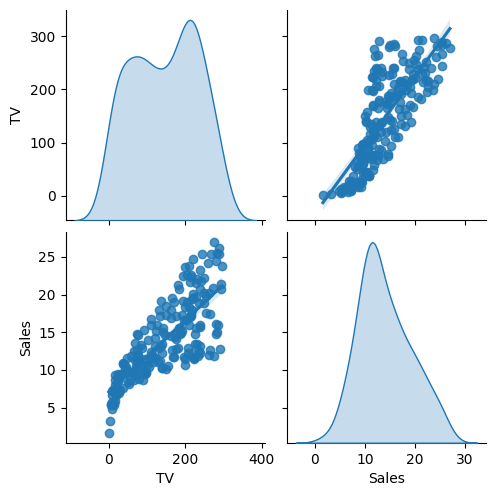

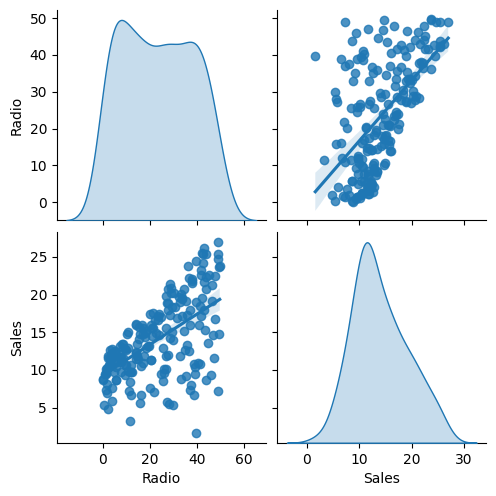

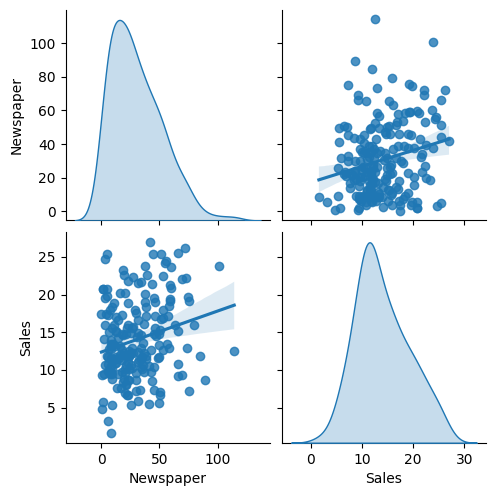

In [15]:
for i in range(len(df.iloc[:, :-1].columns)):
    col = df.columns[i]
    sns.pairplot(df[[col, 'Sales']], kind='reg', diag_kind='kde')

<Axes: >

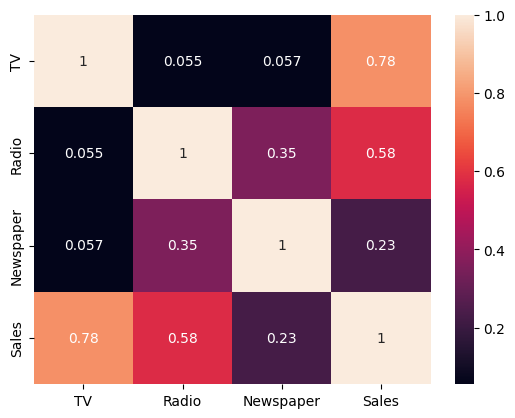

In [20]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [22]:
X_train.index

Index([ 79, 197,  38,  24, 122, 195,  29,  19, 143,  86,
       ...
       121, 199,  20, 188,  71, 106,  14,  92, 179, 102],
      dtype='int64', length=160)

In [23]:
X_test.index

Index([ 95,  15,  30, 158, 128, 115,  69, 170, 174,  45,  66, 182, 165,  78,
       186, 177,  56, 152,  82,  68, 124,  16, 148,  93,  65,  60,  84,  67,
       125, 132,   9,  18,  55,  75, 150, 104, 135, 137, 164,  76],
      dtype='int64')

In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
linear = LinearRegression()

linear.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
y_pred = linear.predict(X_test_scaled)

In [27]:
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_absolute_error: {mean_absolute_error(y_test, y_pred)}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'root_mean_squared_error: {root_mean_squared_error(y_test, y_pred)}')

r2_score: 0.8994380241009119
mean_absolute_error: 1.4607567168117601
mean_absolute_percentage_error: 0.1519884660283123
root_mean_squared_error: 1.781599661533451
